In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
pwd = os.getcwd()

In [3]:
dataset_path = pwd + "\\dataset.csv"

In [4]:
# Load the dataset into a dataframe
df = pd.read_csv(dataset_path)
df.head()

,image,gender_index,age,gender
0,c:\Users\sweek\OneDrive - Lambton College\Proj...,0,100,Male
1,c:\Users\sweek\OneDrive - Lambton College\Proj...,0,100,Male
2,c:\Users\sweek\OneDrive - Lambton College\Proj...,0,100,Male
3,c:\Users\sweek\OneDrive - Lambton College\Proj...,0,100,Male
4,c:\Users\sweek\OneDrive - Lambton College\Proj...,1,100,Female


In [5]:
# Split the data into train, val and test set
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.15, random_state=42)

In [6]:
# Preprocess the image before feeding to model
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
)

In [7]:
# Image size to feed model
batch_size = 32
img_height = 224
img_width = 224

In [8]:
# Train data generator
train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=True  # Shuffle the training data
)

Found 20153 validated image filenames.


In [9]:
# Validation data generator
val_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=False  # No need to shuffle validation data
)

Found 3557 validated image filenames.


In [10]:
 # Test data generator
test_gen = datagen.flow_from_dataframe(
      dataframe=test_df,
      x_col='image',
      y_col='gender_index',  
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='raw',  # Handle integer labels
      shuffle=False  # No shuffle during testing for correct image order
  )

Found 3557 validated image filenames.


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np


In [12]:
# Get the training data
X_train, y_train = next(train_gen)

# Get the validation data
X_val, y_val = next(val_gen)

# Get the test data
X_test, y_test = next(test_gen)


In [13]:
# Reshape the training data to have 2 dimensions
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_train.shape[0], -1)

In [14]:
# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [15]:
# Calculate the accuracy on the training set
train_accuracy = clf.score(X_train, y_train)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 100.00%


In [16]:
# Predict the labels of the validation set
y_pred = clf.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.80      0.80      0.80        20

    accuracy                           0.75        32
   macro avg       0.73      0.73      0.73        32
weighted avg       0.75      0.75      0.75        32



In [17]:
# Predict the labels of the validation set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.75      0.75      0.75        20

    accuracy                           0.69        32
   macro avg       0.67      0.67      0.67        32
weighted avg       0.69      0.69      0.69        32



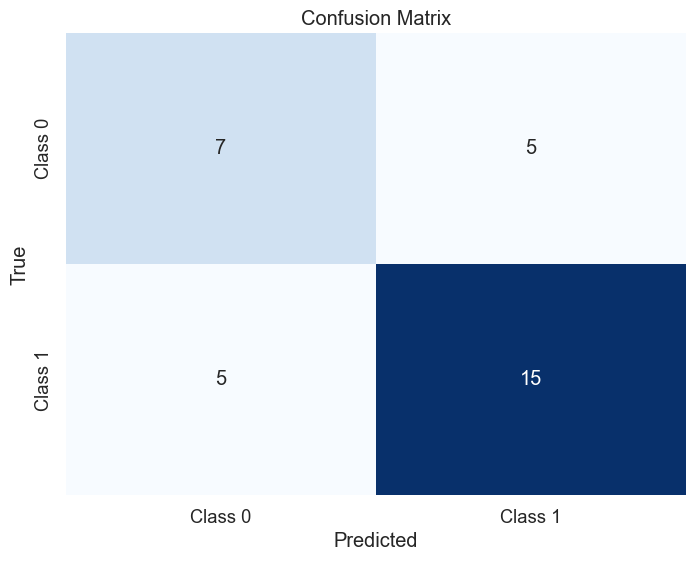

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Class 0', 'Class 1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()